In [1]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

wine = load_wine()
df=pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [2]:
# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.

X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [3]:
param_grid = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

clf_grid = DecisionTreeClassifier( random_state= 42 )
grid_search = GridSearchCV(clf_grid, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print("Best Hyper-parameter", grid_search.best_params_)
print("Best Score", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_grid = best_model.predict(X_test)
accuracy_grid_DT = accuracy_score(y_test, y_pred_grid)
print('Accuracy Grid :', accuracy_grid_DT)
print("\n Classification Report", classification_report(y_test, y_pred_grid))
report_DT = classification_report(y_test, y_pred_grid)

Best Hyper-parameter {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score 0.9224137931034484
Accuracy Grid : 0.9444444444444444

 Classification Report               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



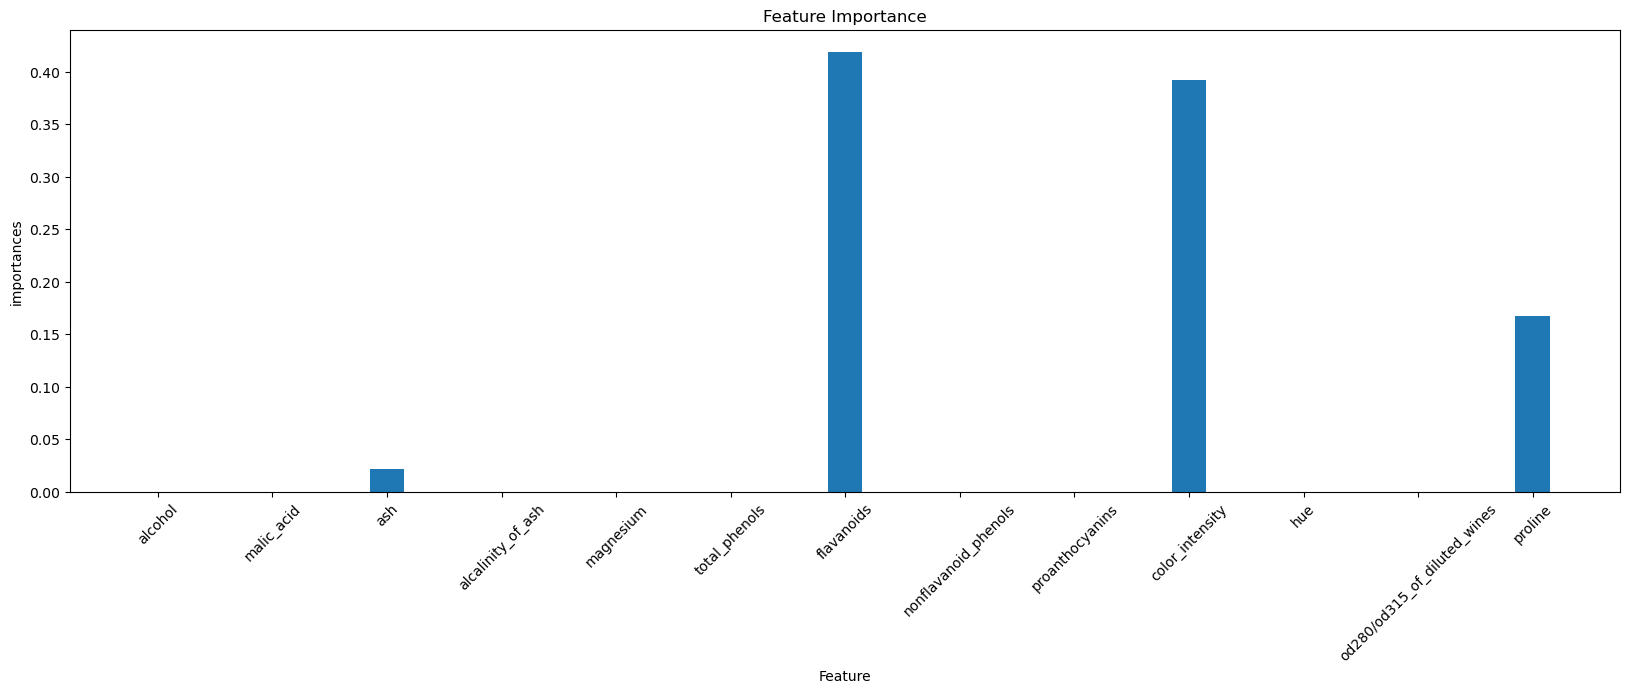

In [4]:
# Feature Importance를 계산
importances = best_model.feature_importances_

# Best model의 Feature Importance를  시각화
plt.figure(figsize = (20,6))

# 막대 그래프 생성
plt.bar(range(len(importances)), importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('importances')
plt.title('Feature Importance')
plt.xticks(range(len(importances)), X.columns, rotation = 45)
plt.show()

In [5]:
# XGboost 모델 생성 및 학습
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
params = {
    "max_depth" : [3, 5, 7, 9, 15],
    "learning_rate" : [0.1, 0.01, 0.001],
    "n_estimators": [50, 100, 200, 300]
}

# 하이퍼파라미터 최적화 
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:" , grid_search.best_score_)
accuracy_grid_XG = grid_search.best_score_

## 최적의 하이퍼파라미터의 학습
best_model = grid_search.best_estimator_

#테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)
report_XG = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy: 0.9576354679802955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



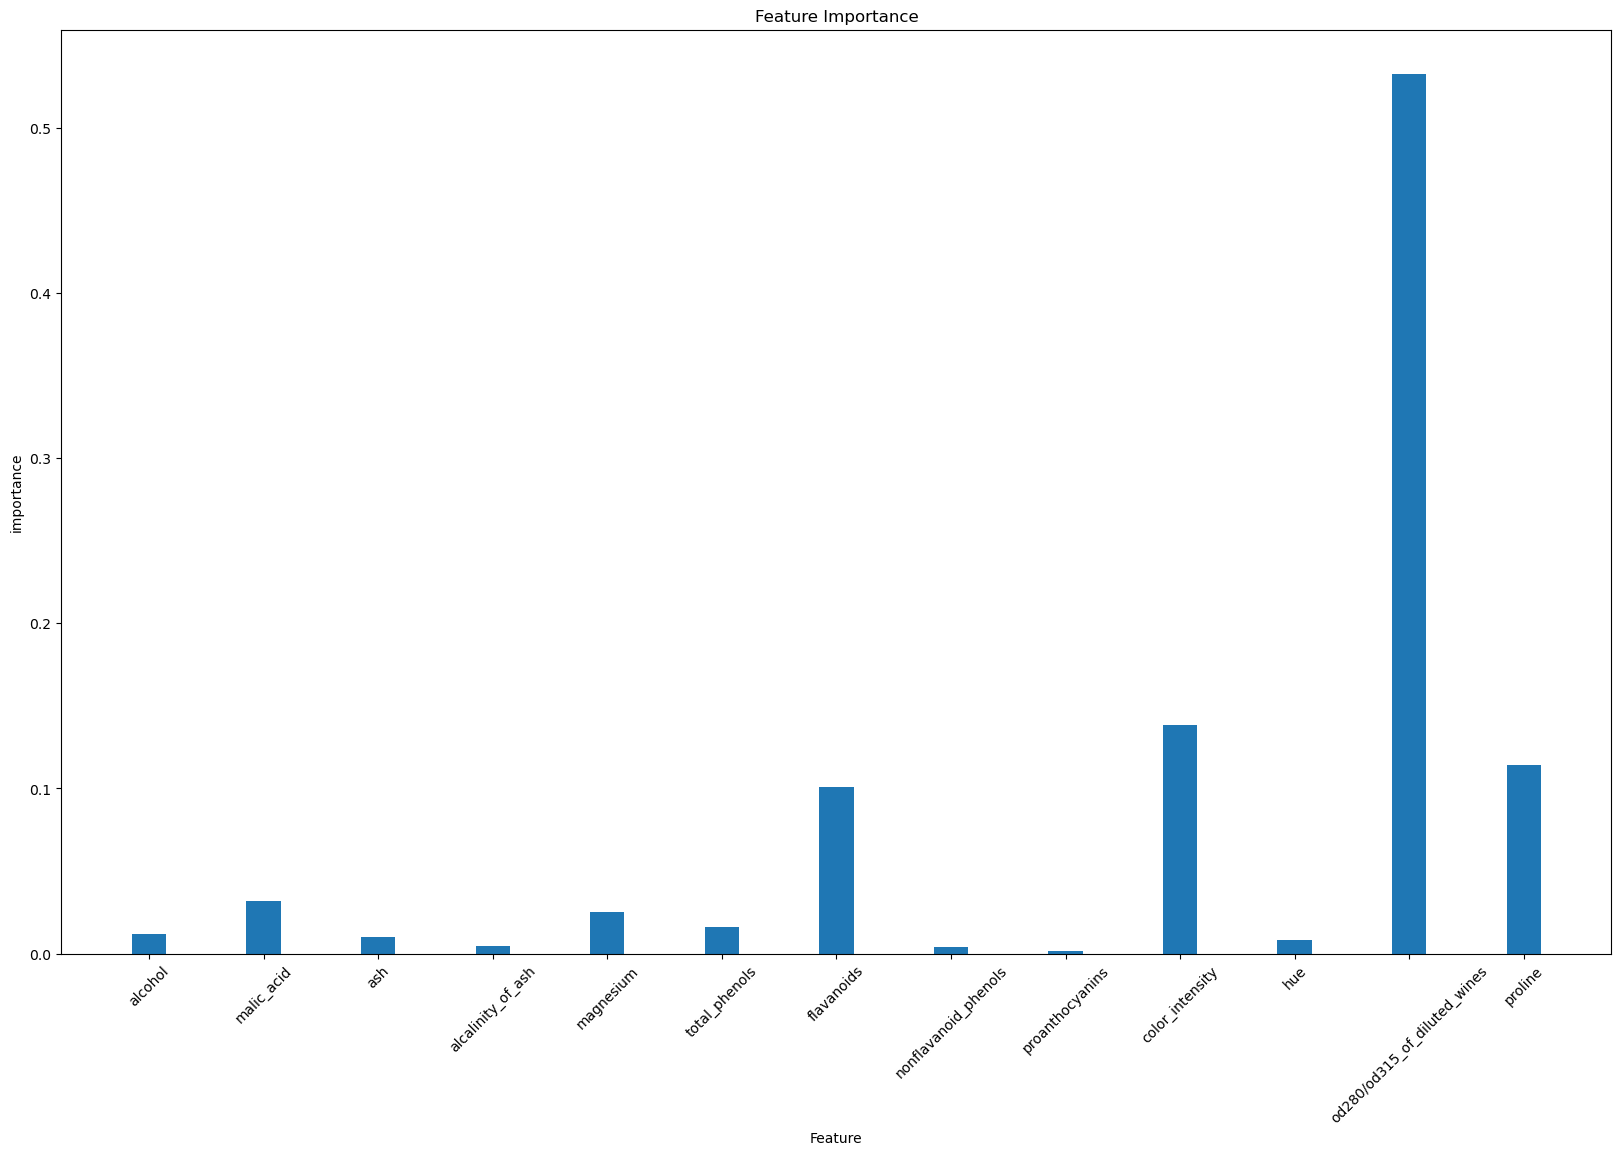

In [7]:
# Feature Importance 시각화
importances = best_model.feature_importances_

plt.figure(figsize= (20,12))

#막대그래프 생성
plt.bar(range(len(importances)), importances, width= 0.3)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Feature Importance')
plt.xticks(range(len(importances)), X.columns, rotation =45)
plt.show()

==========DT 성능 확인==========
DT accuracy :  0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

==========XGB 성능 확인==========
XGB accuracy :  0.9576354679802955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



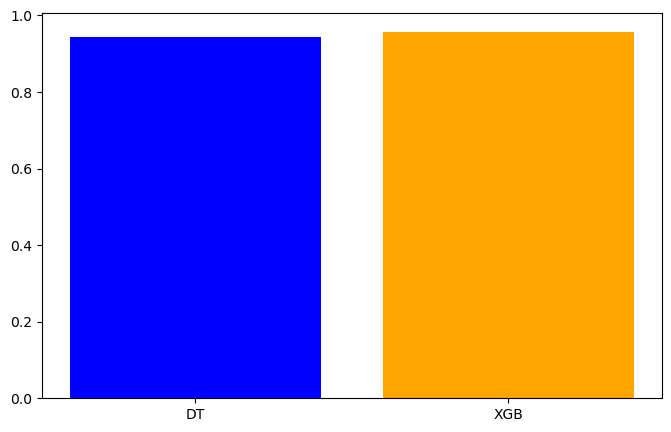

In [8]:
print('=' * 10 + 'DT 성능 확인' + '=' * 10)
print('DT accuracy : ', accuracy_grid_DT)
print(report_DT)

print('=' * 10 + 'XGB 성능 확인' + '=' * 10)
print('XGB accuracy : ', accuracy_grid_XG)
print(report_XG)

# 막대 그래프 생성

graph_x = ['DT','XGB']
graph_y = [accuracy_grid_DT,accuracy_grid_XG]

plt.figure(figsize=(8, 5))
plt.bar(graph_x, graph_y, color=['blue', 'orange'])
plt.show()